<a href="https://colab.research.google.com/github/VictorSairam/CNN_Data_Augmentation_Flower_Classification/blob/main/CNN_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6409000675_6eb6806e59.jpg'),
 PosixPath('datasets/flower_photos/roses/4723876257_d87b781986.jpg'),
 PosixPath('datasets/flower_photos/roses/512694812_48ba9c0b49_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17090993740_fcc8b60b81.jpg'),
 PosixPath('datasets/flower_photos/roses/15602874619_03fd934bed.jpg')]

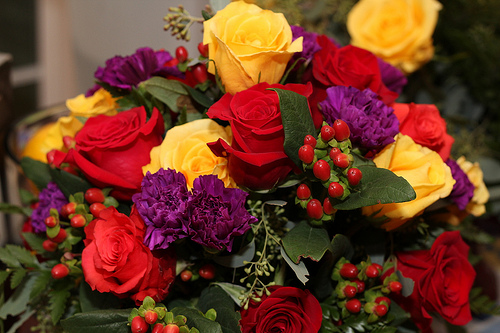

In [7]:
PIL.Image.open(str(roses[0]))

In [8]:
 flowers_images_dict = {
     'roses' : list(data_dir.glob('roses/*.jpg')),
     'daisy' : list(data_dir.glob('daisy/*.jpg')),
     'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
     'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
     'tulips' : list(data_dir.glob('tulips/*.jpg'))
 }

In [9]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [10]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(333, 500, 3)

In [11]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [12]:
x, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [15]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [16]:
x_train_scaled[0]

array([[[0.00392157, 0.00392157, 0.00392157],
        [0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412],
        [0.02352941, 0.02352941, 0.02352941]],

       [[0.00784314, 0.00784314, 0.00784314],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01568627, 0.01568627, 0.01568627],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03529412, 0.03529412, 0.03529412],
        [0.02745098, 0.02745098, 0.02745098]],

       [[0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01960784, 0.01960784, 0.01960784],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.02745098, 0.02745098, 0.02745098]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [17]:
num_classes = 5

model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

model.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 [==============================] - 11s 24ms/step - loss: 1.4702 - accuracy: 0.3510
Epoch 2/30
86/86 [==============================] - 2s 23ms/step - loss: 1.0601 - accuracy: 0.5850
Epoch 3/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8637 - accuracy: 0.6788
Epoch 4/30
86/86 [==============================] - 2s 24ms/step - loss: 0.6507 - accuracy: 0.7671
Epoch 5/30
86/86 [==============================] - 2s 24ms/step - loss: 0.4890 - accuracy: 0.8310
Epoch 6/30
86/86 [==============================] - 2s 24ms/step - loss: 0.3025 - accuracy: 0.8910
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1845 - accuracy: 0.9386
Epoch 8/30
86/86 [==============================] - 2s 24ms/step - loss: 0.1064 - accuracy: 0.9702
Epoch 9/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0637 - accuracy: 0.9840
Epoch 10/30
86/86 [==============================] - 2s 24ms/step - loss: 0.0503 - accuracy: 0.9869
Epoch 11

In [18]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 1s 17ms/step - loss: 2.6593 - accuracy: 0.6362


[2.659313678741455, 0.6361655592918396]

In [19]:
y_predict = model.predict(x_test_scaled)

y_predict

29/29 [==============================] - 0s 11ms/step


array([[ -7.877227  ,   5.4904747 ,  13.999172  ,  -7.809406  ,
         -8.541436  ],
       [ 16.557173  ,  -3.3711329 ,  -6.064215  , -12.512731  ,
          4.341624  ],
       [  5.5418744 ,  11.79909   ,   6.7903123 ,  -7.866596  ,
         -0.2859309 ],
       ...,
       [  6.3444295 ,  -1.5901705 ,  -3.0671782 ,  -3.753229  ,
          6.2682047 ],
       [  0.17471272,  -3.5292227 ,   2.8931057 ,  -3.6607208 ,
         -2.9102678 ],
       [-17.347551  , -11.789404  ,   5.84515   ,  15.10523   ,
          0.90885395]], dtype=float32)

In [20]:
score = tf.nn.softmax(y_predict[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.1558228e-10, 2.0166571e-04, 9.9979836e-01, 3.3772804e-10,
       1.6242428e-10], dtype=float32)>

In [21]:
np.argmax(score)

2

In [22]:
y_test[0]

1

In [23]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.3),
    layers.experimental.preprocessing.RandomRotation(0.5),
    layers.experimental.preprocessing.RandomContrast(0.3)
])

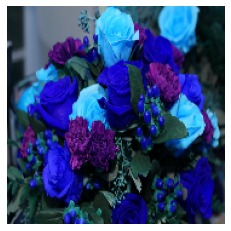

In [24]:
plt.axis('off')
plt.imshow(x[0])

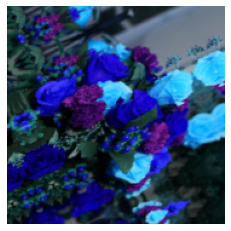

In [25]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [26]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
    )

model.fit(x_train_scaled, y_train, epochs = 30)

Epoch 1/30


86/86 [==============================] - 13s 126ms/step - loss: 1.3317 - accuracy: 0.4062
Epoch 2/30
86/86 [==============================] - 11s 125ms/step - loss: 1.1181 - accuracy: 0.5356
Epoch 3/30
86/86 [==============================] - 11s 127ms/step - loss: 1.0179 - accuracy: 0.6010
Epoch 4/30
86/86 [==============================] - 11s 127ms/step - loss: 0.9694 - accuracy: 0.6134
Epoch 5/30
86/86 [==============================] - 11s 126ms/step - loss: 0.9173 - accuracy: 0.6421
Epoch 6/30
86/86 [==============================] - 11s 127ms/step - loss: 0.8782 - accuracy: 0.6639
Epoch 7/30
86/86 [==============================] - 11s 127ms/step - loss: 0.8632 - accuracy: 0.6602
Epoch 8/30
86/86 [==============================] - 11s 126ms/step - loss: 0.8507 - accuracy: 0.6690
Epoch 9/30
86/86 [==============================] - 11s 127ms/step - loss: 0.8105 - accuracy: 0.6984
Epoch 10/30
86/86 [==============================] - 11s 128ms/step - loss: 0.7869 - accuracy: 0.6919


In [27]:
model.evaluate(x_test_scaled, y_test)

29/29 [==============================] - 1s 12ms/step - loss: 189.9471 - accuracy: 0.5719


[189.94705200195312, 0.5718954205513]